In [1]:
import matplotlib.pyplot as plt
import pandas as pd

articles_df = pd.read_csv('articles_preprocessed_puncts.csv')
articles_df['article'] = articles_df['article_punct']
new_samples = pd.read_csv('sampling_arts_prep.csv')

In [2]:
articles_df

,link,title,article,кластер,emotion,article_punct
0,https://www.d-kvadrat.ru/novosti/26371,В Удмуртии простятся с погибшим под Артемовско...,июня года состоится прощание с Денисом Никол...,0,Негативная,июня года состоится прощание с Денисом Никол...
1,https://www.d-kvadrat.ru/novosti/25948,В зоне СВО погиб наш земляк Андрей Богданов,В зоне боевых действий в Луганской Народной Ре...,0,Негативная,В зоне боевых действий в Луганской Народной Ре...
2,https://www.d-kvadrat.ru/novosti/26605,Якшур-Бодьинский район проводил защитников Оте...,"Вчера, июля, ЯкшурБодьинский район попрощался...",0,Негативная,"Вчера, июля, ЯкшурБодьинский район попрощался..."
3,https://www.d-kvadrat.ru/novosti/27622,Турнир памяти героя: Ижевск вспоминает гвардии...,В честь памяти участника специальной военной о...,0,Позитивная,В честь памяти участника специальной военной о...
4,https://www.d-kvadrat.ru/novosti/24150,В Удмуртии простились с рядовым Альбертом Ямал...,В Завьяловском районе Удмуртии января прошли ...,0,Негативная,В Завьяловском районе Удмуртии января прошли ...
...,...,...,...,...,...,...
1035,https://www.d-kvadrat.ru/novosti/27598,Индекс МосБиржи завершил торги в пятницу ростом,Индекс МосБиржи завершил торги в пятницу росто...,4,Позитивная,Индекс МосБиржи завершил торги в пятницу росто...
1036,https://www.d-kvadrat.ru/novosti/26927,Индекс МосБиржи в четверг продолжил попытки до...,Индекс МосБиржи в четверг продолжил попытки до...,4,Позитивная,Индекс МосБиржи в четверг продолжил попытки до...
1037,https://www.d-kvadrat.ru/novosti/23399,Краткосрочные ОФЗ продолжают дорожать,Краткосрочные облигаций федерального займа ОФЗ...,4,Позитивная,Краткосрочные облигаций федерального займа ОФЗ...
1038,https://www.d-kvadrat.ru/novosti/24557,Индекс МосБиржи завершил вечернюю сессию сдерж...,"Индекс МосБиржи , в ходе высоковолатильных тор...",4,Нейтральная,"Индекс МосБиржи , в ходе высоковолатильных тор..."


In [3]:
articles_df['emotion'].value_counts()

emotion
Позитивная     436
Негативная     339
Нейтральная    265
Name: count, dtype: int64

In [4]:
articles_df['emotion'].value_counts()['Негативная']

339

# Сбалансируем классы, чтобы было поровну (У меня было два напаршенных датасета)

In [5]:
new_samples['emotion'].value_counts()
new_neg = new_samples[new_samples['emotion'] == 'Негативная']
new_neutral = new_samples[new_samples['emotion'] == 'Нейтральная']

new_neg = new_neg.sample(frac=1)
new_neutral = new_neutral.sample(frac=1)

needed_neg = 436 - 339
needed_neutral = 436 - 265

new_neg = new_neg[:needed_neg]
new_neutral = new_neutral[:needed_neutral]

new_samples = pd.concat([new_neg, new_neutral])

In [6]:
new_samples['article_punct'] = new_samples['article']
articles_df = pd.concat([articles_df, new_samples])

In [7]:
rus_alph = set(list('абвгдеёжзийклмнопрстуфхцчшщъыьэюя'))
punctuations = set(list('!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~«»—…“”№'))

# drop_not_letters = lambda x: ''.join(list(filter(lambda y: y in rus_alph or y == ' ', x.lower())))
drop_not_letters = lambda x: ''.join(list(filter(lambda y: y in rus_alph or y in punctuations or y == ' ', x.lower())))
articles_df['article'] = articles_df['article'].apply(drop_not_letters)

In [8]:
# # удалим слова удмуртии и также
# def remove_udmurtiya(text):
#     return ' '.join([word for word in text.split(' ') if word != 'удмуртии' and word != 'ижевске' and word != 'также' and word != 'это'])
#
# articles_df['article'] = articles_df['article'].apply(remove_udmurtiya)

In [9]:
def switch_device_if_cuda_available(model):
    if torch.cuda.is_available():
        device = torch.device("cuda")
        model.to(device)
        print("GPU available")
    else:
        device = torch.device("cpu")
        print("GPU not available")
    return model, device

In [10]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

rus_stopwords = stopwords.words('russian')

remove_stopwords = lambda x: ' '.join(list(filter(lambda y: y not in rus_stopwords, x.split(' '))))
articles_df['article'] = articles_df['article'].apply(remove_stopwords)
def remove_empty(text):
    return ' '.join([word for word in text.split(' ') if word != ''])

articles_df['article'] = articles_df['article'].apply(remove_empty)

[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:992)>


In [11]:
articles_df

,link,title,article,кластер,emotion,article_punct
0,https://www.d-kvadrat.ru/novosti/26371,В Удмуртии простятся с погибшим под Артемовско...,июня года состоится прощание денисом николаеви...,0,Негативная,июня года состоится прощание с Денисом Никол...
1,https://www.d-kvadrat.ru/novosti/25948,В зоне СВО погиб наш земляк Андрей Богданов,зоне боевых действий луганской народной респуб...,0,Негативная,В зоне боевых действий в Луганской Народной Ре...
2,https://www.d-kvadrat.ru/novosti/26605,Якшур-Бодьинский район проводил защитников Оте...,"вчера, июля, якшурбодьинский район попрощался ...",0,Негативная,"Вчера, июля, ЯкшурБодьинский район попрощался..."
3,https://www.d-kvadrat.ru/novosti/27622,Турнир памяти героя: Ижевск вспоминает гвардии...,честь памяти участника специальной военной опе...,0,Позитивная,В честь памяти участника специальной военной о...
4,https://www.d-kvadrat.ru/novosti/24150,В Удмуртии простились с рядовым Альбертом Ямал...,завьяловском районе удмуртии января прошли пох...,0,Негативная,В Завьяловском районе Удмуртии января прошли ...
...,...,...,...,...,...,...
429,https://www.d-kvadrat.ru/novosti/26935,За неделю в Ижевске сделали 30% ремонтных рабо...,ремонт проводится улице кирова песочной удмурт...,1,Нейтральная,Ремонт проводится на улице Кирова от Песочной ...
791,https://www.d-kvadrat.ru/novosti/27656,Сегодня рубль постарается продолжить укрепление,сегодня рубль постарается продолжить укреплени...,4,Нейтральная,Сегодня рубль постарается продолжить укреплени...
789,https://www.d-kvadrat.ru/novosti/23117,Как на самом деле звали Люсьена Оливье и во ск...,"советских т.е. колбасных версий, существует ме...",4,Нейтральная,"Даже без советских т.е. колбасных версий, суще..."
1022,https://www.d-kvadrat.ru/novosti/24762,Доллар стремится к максимумам 2023 года,пятницу пара долларрубль продолжила плавный ро...,4,Нейтральная,В пятницу пара долларрубль продолжила плавный ...


In [12]:
# Я убираю нейтральные статьи, дальше их не использую
articles_df = articles_df[articles_df['emotion'] != 'Нейтральная']

In [13]:
def augment_data(df, emotion, n):
    df = df[df['emotion'] == emotion]
    df = df.sample(frac=1)
    df = df[:n]
    return df

In [14]:
negative_df = augment_data(articles_df, 'Негативная', 339)
positive_df = augment_data(articles_df, 'Позитивная', 339)

In [15]:
articles_df = pd.concat([articles_df, negative_df, positive_df])

In [16]:
articles_df

,link,title,article,кластер,emotion,article_punct
0,https://www.d-kvadrat.ru/novosti/26371,В Удмуртии простятся с погибшим под Артемовско...,июня года состоится прощание денисом николаеви...,0,Негативная,июня года состоится прощание с Денисом Никол...
1,https://www.d-kvadrat.ru/novosti/25948,В зоне СВО погиб наш земляк Андрей Богданов,зоне боевых действий луганской народной респуб...,0,Негативная,В зоне боевых действий в Луганской Народной Ре...
2,https://www.d-kvadrat.ru/novosti/26605,Якшур-Бодьинский район проводил защитников Оте...,"вчера, июля, якшурбодьинский район попрощался ...",0,Негативная,"Вчера, июля, ЯкшурБодьинский район попрощался..."
3,https://www.d-kvadrat.ru/novosti/27622,Турнир памяти героя: Ижевск вспоминает гвардии...,честь памяти участника специальной военной опе...,0,Позитивная,В честь памяти участника специальной военной о...
4,https://www.d-kvadrat.ru/novosti/24150,В Удмуртии простились с рядовым Альбертом Ямал...,завьяловском районе удмуртии января прошли пох...,0,Негативная,В Завьяловском районе Удмуртии января прошли ...
...,...,...,...,...,...,...
63,https://www.d-kvadrat.ru/novosti/25386,Доброволец из Удмуртии получил орден Мужества ...,участника спецоперации удмуртии позывным баги ...,0,Позитивная,Участника спецоперации из Удмуртии с позывным ...
566,https://www.d-kvadrat.ru/novosti/27187,В Ижевске откроется интерактивный музей тепла,работать августа. сообщает прессслужба админис...,3,Позитивная,Работать он будет с по августа. Об этом сооб...
806,https://www.d-kvadrat.ru/novosti/23545,Укрепление рубля поддерживает спрос на ОФЗ,укрепление рубля поддерживает спрос облигации ...,4,Позитивная,Укрепление рубля поддерживает спрос на облигац...
283,https://www.d-kvadrat.ru/novosti/23628,Из Удмуртии отправили 126 коробок с подарками ...,декабря удмуртии отправили коробок подарков во...,1,Позитивная,декабря из Удмуртии отправили коробок подарк...


# Токенизация с помощью YouTokenToMe

In [17]:
import youtokentome as yttm
from collections import Counter

corpus = [word for word in articles_df['article'] for word in word.split(' ')]
count = Counter(corpus)
sorted_words = count.most_common()

In [18]:
with open('corpus.txt', 'w') as f:
    for word, freq in sorted_words:
        f.write(word + ' ' + str(freq) + '\n')

yttm.BPE.train(data='corpus.txt', vocab_size=5000, model='bpe.model', pad_id=0, unk_id=1, bos_id=2, eos_id=3)
bpe = yttm.BPE('bpe.model')

Training parameters
  input: corpus.txt
  model: bpe.model
  vocab_size: 5000
  n_threads: 8
  character_coverage: 1
  pad: 0
  unk: 1
  bos: 2
  eos: 3

reading file...
learning bpe...
number of unique characters in the training data: 49
number of deleted characters: 0
number of unique characters left: 49
id: 1000=60+223               freq: 28          subword: ний.=ни+й.
id: 2000=136+154              freq: 13          subword: ▁отве=▁от+ве
id: 3000=67+379               freq: 9           subword: ▁оцен=▁о+цен
id: 4000=123+23               freq: 6           subword: мая=ма+я
model saved to: bpe.model


In [19]:
vocab = bpe.vocab()

In [20]:
#пример токенизации

text = 'а б в г д е ж'
print(bpe.encode(text))
print(bpe.decode(bpe.encode(text)))

[102, 98, 70, 127, 84, 269, 1110]
['а б в г д е ж']


In [21]:
articles_df['tokenized_article'] = articles_df['article'].apply(bpe.encode)

In [22]:
print(articles_df['tokenized_article'][0])

0    [1549, 209, 179, 101, 146, 182, 8, 360, 3024, ...
0    [584, 88, 2237, 8, 3403, 279, 235, 114, 642, 2...
0    [1549, 209, 179, 101, 146, 182, 8, 360, 3024, ...
0    [584, 88, 2237, 8, 3403, 279, 235, 114, 642, 2...
Name: tokenized_article, dtype: object


In [23]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
articles_df['emotion'] = le.fit_transform(articles_df['emotion'])

In [24]:
article_len = articles_df['tokenized_article'].apply(len)
articles_df['article_len'] = article_len
article_len.describe()


count    1550.000000
mean      280.720645
std       221.608330
min        60.000000
25%       162.250000
50%       227.000000
75%       318.000000
max      2477.000000
Name: tokenized_article, dtype: float64

In [25]:
len(article_len[article_len > 500])

129

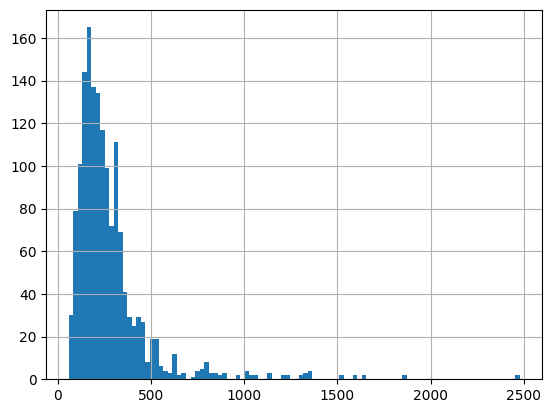

In [26]:
articles_df['article_len'].hist(bins=100)
plt.show()

*Делаю кроп по слишком длинным статьям, добавляю паддинги, чтобы все токенизированные текста были одной длины*

In [27]:
def crop_article(article):
    if len(article) > 400:
        return article[:400]
    else:
        return article

In [28]:
articles_df['tokenized_article'] = articles_df['tokenized_article'].apply(crop_article)

In [29]:
def padding(articles, seq_len):
    pads = np.zeros((len(articles), seq_len),dtype=int)
    for ii, article in enumerate(articles):
        if len(article) != 0:
            pads[ii, -len(article):] = np.array(article)[:seq_len]
    return pads

In [30]:
import numpy as np
X = padding(articles_df['tokenized_article'], 400)

In [31]:
X

array([[   0,    0,    0, ..., 2476, 4445,  502],
       [   0,    0,    0, ..., 2353, 2237,  659],
       [   0,    0,    0, ..., 1644,  672,   25],
       ...,
       [   0,    0,    0, ...,  114, 1099, 1996],
       [   0,    0,    0, ...,   35, 4730,  579],
       [   0,    0,    0, ..., 1404, 3121,  466]])

*Разбиваю на трейн, валидацию и тест*

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, articles_df['emotion'], test_size=0.2, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid, y_valid, test_size=0.5, random_state=42)

*Создаю даталоадеры*

In [33]:
import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn

train_data = TensorDataset(torch.from_numpy(X_train), torch.from_numpy(y_train.values))
validation_data = TensorDataset(torch.from_numpy(X_valid), torch.from_numpy(y_valid.values))
test_data = TensorDataset(torch.from_numpy(X_test), torch.from_numpy(y_test.values))

batch_size = 40

train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size, drop_last=True)
validation_loader = DataLoader(validation_data, shuffle=True, batch_size=batch_size, drop_last=True)
test_loader = DataLoader(test_data, shuffle=True, batch_size=batch_size, drop_last=True)
dataiter = next(iter(train_loader))
X, y = dataiter
print(X.shape, y.shape)

torch.Size([40, 400]) torch.Size([40])


*Далее идет реализации nn.Embedding+nn.LSTM+nn.Linear модели с активацией (сигмоида) в конце*

In [34]:
class RNN(nn.Module):
    def __init__(self):
        super(RNN,self).__init__()

        self.output_dim = 1
        self.hidden_dim = 128
        self.no_layers = 3
        self.vocab_size = len(vocab)

        self.embedding = nn.Embedding(len(vocab), 50)

        self.lstm = nn.LSTM(input_size=50, hidden_size=self.hidden_dim, num_layers=self.no_layers, batch_first=True)

        self.dropout = nn.Dropout(0.3)
        self.fc = nn.Linear(self.hidden_dim, self.output_dim)
        self.sig = nn.Sigmoid()

    def forward(self,x,hidden):
        batch_len = x.size(0)
        embeds = self.embedding(x)

        lstm_out, hidden = self.lstm(embeds, hidden)
        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)

        out = self.dropout(lstm_out)
        out = self.fc(out)

        sig_out = self.sig(out)
        sig_out = sig_out.view(batch_len, -1)
        sig_out = sig_out[:, -1]
        return sig_out, hidden

    def init_hidden(self, batch_len):
        h0 = torch.zeros((self.no_layers,batch_len,self.hidden_dim)).to(device)
        c0 = torch.zeros((self.no_layers,batch_len,self.hidden_dim)).to(device)
        hidden = (h0,c0)
        return hidden

In [35]:

model = RNN()
model, device = switch_device_if_cuda_available(model)
print(model)

GPU not available
RNN(
  (embedding): Embedding(5000, 50)
  (lstm): LSTM(50, 128, num_layers=3, batch_first=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=128, out_features=1, bias=True)
  (sig): Sigmoid()
)


*Обучение*

In [36]:
import torch
import torch.nn as nn
import numpy as np

def train_epoch(model, train_loader, criterion, optimizer, device, clip):
    model.train()
    train_losses = []
    train_acc = 0.0
    h = model.init_hidden(batch_size)

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        h = tuple([each.data for each in h])
        optimizer.zero_grad()
        output, h = model(inputs, h)

        loss = criterion(output.squeeze(), labels.float())
        loss.backward()
        train_losses.append(loss.item())

        accuracy = calculate_accuracy(output, labels)
        train_acc += accuracy

        nn.utils.clip_grad_norm_(model.parameters(), clip)
        optimizer.step()

    return np.mean(train_losses), train_acc / len(train_loader.dataset)

In [37]:

def validate_epoch(model, validation_loader, criterion, device):
    model.eval()
    val_losses = []
    val_acc = 0.0
    val_h = model.init_hidden(batch_size)

    for inputs, labels in validation_loader:
        val_h = tuple([each.data for each in val_h])
        inputs, labels = inputs.to(device), labels.to(device)
        output, val_h = model(inputs, val_h)
        val_loss = criterion(output.squeeze(), labels.float())
        val_losses.append(val_loss.item())

        accuracy = calculate_accuracy(output, labels)
        val_acc += accuracy

    return np.mean(val_losses), val_acc / len(validation_loader.dataset)

In [38]:

def calculate_accuracy(output, labels):
    pred = torch.round(output.squeeze())
    correct_tensor = pred.eq(labels.long().view_as(pred))
    return np.sum(correct_tensor.cpu().numpy())

In [39]:

def train_model(model, train_loader, validation_loader, criterion, optimizer, device, epochs, clip, valid_loss_min=np.Inf):
    epoch_tr_loss =[]
    epoch_tr_acc = []
    epoch_vl_loss = []
    epoch_vl_acc = []
    best_model = None

    for epoch in range(epochs):
        train_loss, train_acc = train_epoch(model, train_loader, criterion, optimizer, device, clip)
        valid_loss, valid_acc = validate_epoch(model, validation_loader, criterion, device)

        epoch_tr_loss.append(train_loss)
        epoch_vl_loss.append(valid_loss)
        epoch_tr_acc.append(train_acc)
        epoch_vl_acc.append(valid_acc)

        print(f'Epoch {epoch + 1}')
        print(f'train_acc: {train_acc * 100} train_loss: {train_loss}')
        print(f'val_acc: {valid_acc * 100} val_loss: {valid_loss}')
        if valid_loss <= valid_loss_min:
            valid_loss_min = valid_loss
            best_model = model
            print(f'Loss of validation decreased to {valid_loss}.'
                  f'Best model saved')
    return epoch_tr_loss, epoch_vl_loss, epoch_tr_acc, epoch_vl_acc, best_model

In [40]:

criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.002)
epoch_tr_loss, epoch_vl_loss, epoch_tr_acc, epoch_vl_acc, best_model = train_model(model, train_loader, validation_loader, criterion, optimizer, device, epochs=10, clip=10)

Epoch 1
train_acc: 56.935483870967744 train_loss: 0.672453103526946
val_acc: 52.903225806451616 val_loss: 0.6358752051989237
Loss of validation decreased to 0.6358752051989237.Best model saved
Epoch 2
train_acc: 75.80645161290323 train_loss: 0.5348503781903174
val_acc: 54.19354838709678 val_loss: 0.5731425285339355
Loss of validation decreased to 0.5731425285339355.Best model saved
Epoch 3
train_acc: 85.16129032258064 train_loss: 0.3717367644271543
val_acc: 60.0 val_loss: 0.46734171112378436
Loss of validation decreased to 0.46734171112378436.Best model saved
Epoch 4
train_acc: 93.2258064516129 train_loss: 0.21500767623224565
val_acc: 67.74193548387096 val_loss: 0.3380855719248454
Loss of validation decreased to 0.3380855719248454.Best model saved
Epoch 5
train_acc: 96.45161290322581 train_loss: 0.12541633922486536
val_acc: 70.96774193548387 val_loss: 0.34267722566922504
Epoch 6
train_acc: 97.09677419354838 train_loss: 0.12011305453075517
val_acc: 68.38709677419355 val_loss: 0.38380291

In [41]:
def predict_text(text):
    text = bpe.encode(text)
    text = np.array(text)
    text = np.expand_dims(text, axis=0)
    text = torch.from_numpy(text)
    text = text.to(device)
    model.eval()
    h = model.init_hidden(1)
    h = tuple([each.data for each in h])
    output, h = model(text, h)
    return output.item()

*Проверка на тесте*

In [42]:
def test_model(model, test_loader, criterion, device):
    model.eval()
    test_losses = []
    num_correct = 0

    test_h = model.init_hidden(batch_size)
    for inputs, labels in test_loader:
        test_h = tuple([each.data for each in test_h])
        inputs, labels = inputs.to(device), labels.to(device)
        output, test_h = model(inputs, test_h)

        test_loss = criterion(output.squeeze(), labels.float())
        test_losses.append(test_loss.item())

        pred = torch.round(output.squeeze())

        correct_tensor = pred.eq(labels.float().view_as(pred))
        correct = np.squeeze(correct_tensor.cpu().numpy())
        num_correct += np.sum(correct)

    test_accuracy = num_correct / len(test_loader.dataset)
    print(f'Test accuracy: {test_accuracy}')
    print(f'Test loss: {np.mean(test_losses)}')

In [46]:
# model_for_test = best_model
# model_for_test, device = switch_device_if_cuda_available(model_for_test)
test_model(model, test_loader, criterion, device)

Test accuracy: 0.6967741935483871
Test loss: 0.3327360302209854
